# Week 12 handin

## 01 Assignment
### Part 1
1. Take a picture of an apple and put it in the image folder in the notebook environment
2. Find the contour of the apple
3. Draw a yellow circle with the center placed on the center of the apple contour
4. Draw a square that precisely holds the apple
5. Take a picture of three seperate apples.
6. Use contours to programmatically identify the number of apples in the photo

## 02 Status
Exercises completed

## 03 Solution

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
img_loc = '../../images/applegoogle.png'
img = cv2.imread(img_loc, 1)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


ret, thresh_H = cv2.threshold(img_hsv[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret, thresh_S = cv2.threshold(img_hsv[:,:,1], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((5, 5), np.uint8)
thresh = thresh_H + thresh_S
print('Image shape',img_hsv.shape,'Thresh',thresh.shape,np.unique(thresh))
img_dilated = cv2.dilate(thresh, kernel, iterations = 1)


(contours, hierarchy) = cv2.findContours(img_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(contours)


Image shape (1889, 2400, 3) Thresh (1889, 2400) [  0 254 255]
[array([[[984, 187]],

       [[983, 188]],

       [[982, 188]],

       ...,

       [[987, 187]],

       [[986, 187]],

       [[985, 187]]], dtype=int32)]


<Figure size 432x288 with 0 Axes>

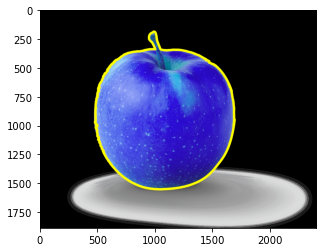

<Figure size 432x288 with 0 Axes>

In [4]:
im1 = img.copy()
for c in contours:
    cv2.drawContours(im1, contours=[c], contourIdx=-1, color=(255,255,0),thickness=20)
plt.imshow(im1)
plt.figure()

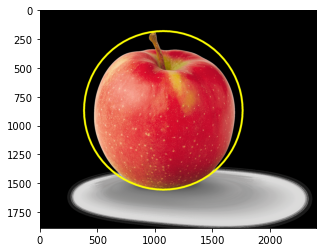

In [5]:
for contour in contours:
    (x, y), radius = cv2.minEnclosingCircle (contour)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    draw_img = img_rgb.copy()
    cv2.circle(draw_img,(int(x),int(y)), radius=int(radius), color=(255,255,0), thickness=15)
plt.imshow(draw_img)

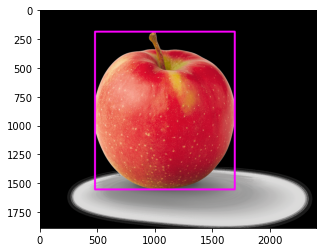

In [6]:
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    draw_img = img_rgb.copy()
    cv2.rectangle(draw_img,(x,y),(x+w,y+h),(255,0,255),thickness=15)       
    
plt.imshow(draw_img)

Image shape (320, 960, 3) Thresh (320, 960) [  0 254 255]
There are 3 apples


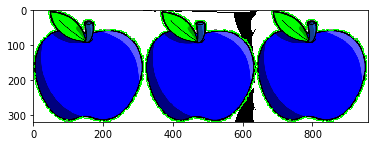

In [11]:
img2 = cv2.imread('../../images/threegoogleapples.png', 1)

img_hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)


ret, thresh_H = cv2.threshold(img_hsv[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret, thresh_S = cv2.threshold(img_hsv[:,:,1], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((5, 5), np.uint8)
thresh = thresh_H + thresh_S
print('Image shape',img_hsv.shape,'Thresh',thresh.shape,np.unique(thresh))
img_dilated = cv2.dilate(thresh, kernel, iterations = 1)

(contours, hierarchy) = cv2.findContours(img_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
im1 = img2.copy()
for c in contours:
    cv2.drawContours(im1, contours=[c], contourIdx=-1, color=(0,0,0),thickness=2)
plt.figure()

im2 = img2.copy()
count = 0
for c in contours:
    if cv2.contourArea(c) > 500:
        count+=1
        cv2.drawContours(im2, [c], -1, (0, 255, 0), 2)

plt.imshow(im2, interpolation='none')
print(f'There are {count} apples')